# Analytic Calculations

In [ ]:
# imports
from laminatelib import laminateStiffnessMatrix, laminateThickness, layerResults, plotLayerFailure
import numpy as np

In [1]:
# Defining dimensions and loads
Nx = 1000 # N/mm
sheet_width = 1000 # mm
d = 20 # mm
n = 6
q1 = Nx * sheet_width / (d * n)
q2 = Nx / (1 - d/sheet_width * n)
print(q1)
print(q2)

8333.333333333334
1136.3636363636363


In [96]:
# Material
cfrp = {"name": "CFRP", "units": "MPa-mm-Mg", "type": "UD", "fiber": "Carbon",
        "Vf": 0.55, "rho": 1600E-12,
        "description": "Vacuum infused UD carbon (T300)",  
        "E1": 130000, "E2": 10000, "E3": 10000, 
        "v12": 0.28, "v13": 0.28, "v23": 0.5, 
        "G12": 4500, "G13": 4500, "G23": 3500, 
        "a1": -0.5e-06, "a2": 3.0e-05, "a3": 3.0e-05, 
        "XT": 1400, "YT": 30, "ZT": 30,
        "XC":  900, "YC": 120, "ZC": 120,
        "S12": 60, "S13": 60, "S23": 30,
        "f12":-0.5, "f13":-0.5, "f23":-0.5}

# Layup
layup  = [ {'mat':cfrp , 'ori':  0  , 'thi':0.6},
           {'mat':cfrp , 'ori':  0  , 'thi':0.6},
           {'mat':cfrp , 'ori':  0  , 'thi':0.6},
           {'mat':cfrp , 'ori':-45  , 'thi':0.6},
           {'mat':cfrp , 'ori': 45  , 'thi':0.6},
           {'mat':cfrp , 'ori':  0  , 'thi':0.6},
           {'mat':cfrp , 'ori':  0  , 'thi':0.6},
           {'mat':cfrp , 'ori':  0  , 'thi':0.6},
           {'mat':cfrp , 'ori': 45  , 'thi':0.6},
           {'mat':cfrp , 'ori':-45  , 'thi':0.6},
           {'mat':cfrp , 'ori':  0  , 'thi':0.6},
           {'mat':cfrp , 'ori':  0  , 'thi':0.6},
           {'mat':cfrp , 'ori':  0  , 'thi':0.6} ]

In [ ]:
# Calculate effective stress
ABD = laminateStiffnessMatrix(layup)
h = laminateThickness(layup)

# Result from compressive load q1
load_1 = (-q1,0,0,0,0,0)
deformations_1 = np.linalg.solve(ABD, load_1)
results_1 = layerResults(layup,deformations_1)

# Result from tensile load q1
load_2 = (q2,0,0,0,0,0)
deformations_2 = np.linalg.solve(ABD, load_2)
results_2 = layerResults(layup,deformations_2)

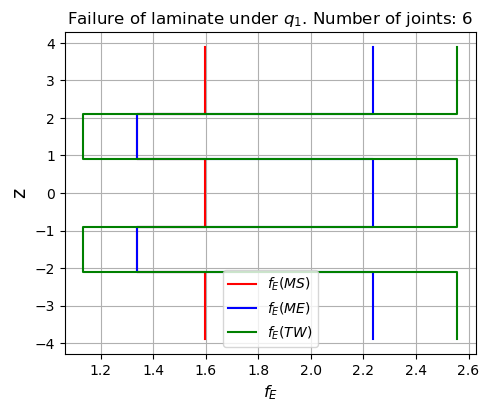

In [108]:
plotLayerFailure(results_1, title="Failure of laminate under $q_1$. Number of joints: {}".format(n))

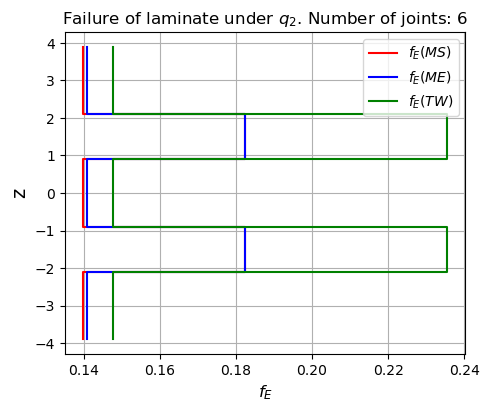

In [109]:
plotLayerFailure(results_2, title="Failure of laminate under $q_2$. Number of joints: {}".format(n))

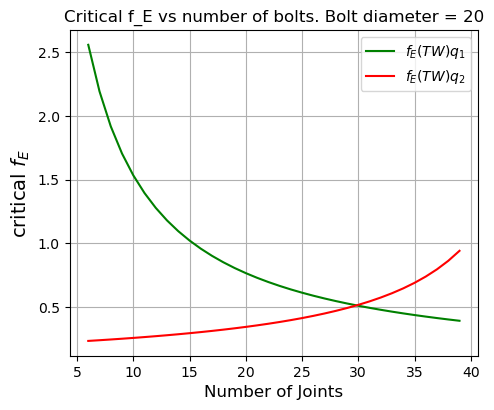

In [ ]:
# Max Tsai-Wu for different number of bolts
def plotTsaiWu(title=''):

    critical_fE_1, critical_fE_2 = [], []
    num_bolts = []

    for n in range(6, 40):
        num_bolts.append(n)

        q1 = Nx * sheet_width / (d * n)
        q2 = Nx / (1 - d/sheet_width * n)

        load_1 = (-q1,0,0,0,0,0)
        load_2 = (q2,0,0,0,0,0)

        deformations_1 = np.linalg.solve(ABD, load_1)
        results_1 = layerResults(layup,deformations_1)

        deformations_2 = np.linalg.solve(ABD, load_2)
        results_2 = layerResults(layup,deformations_2)

        tw_1, tw_2 = [], []
        for layer in results_1:
            tw_1.append(layer['fail']['TW']['bot'])
            tw_1.append(layer['fail']['TW']['top'])
        for layer in results_2: 
            tw_2.append(layer['fail']['TW']['bot'])
            tw_2.append(layer['fail']['TW']['top'])

        critical_fE_1.append(np.max(tw_1))
        critical_fE_2.append(np.max(tw_2))
    
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4))
    ax.grid(True)
    ax.plot(num_bolts,critical_fE_1,'-',color='green',label='$f_E (TW) q_1$')
    ax.plot(num_bolts,critical_fE_2,'-',color='red',label='$f_E (TW) q_2$')
    ax.set_xlabel('Number of Joints',fontsize=12)
    ax.set_ylabel('critical $f_E$', fontsize=14)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.title(title)
    plt.show()

plotTsaiWu(title="Critical f_E vs number of bolts. Bolt diameter = {}".format(d))